# A Star Algorithm

References:
1. https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2
2. https://medium.com/nerd-for-tech/graph-traversal-in-python-a-algorithm-27c30d67e0d0
3. https://en.wikipedia.org/wiki/A*_search_algorithm
4. https://www.youtube.com/watch?v=71CEj4gKDnE&t=44s
5. https://www.youtube.com/watch?v=kAsVvS02T_U

and Aalto University Slides

## Further explanation

- g(s) = cost of path from initial state to current state s
- h(s) = heuristic: estimated cost from current state s to to goal state g. like giving the algorithm some hints for finding best path
- f(s) = total cost of node: g(s) + h(s). Estimate of total cost of the path we're looking at

### More on Heuristic Function h
Must be the true lower bound of the actual cost of reaching a goal state
- Never overestimates true lower bound cost to the goal
- Gives the algorithm some hints for finding best path
- An idea of where to go
- Like the smell to cheese, or telling us if we are getting hotter or colder
- Allows us to prioritise our options

Properties
- Admissible: For all states s, h(s) <= d(s) where d(s) us the actual cost of the least expensive path from s to a goal state. Assume h(g)=0
- Consistency/Monotonicity (Guarantees Admissibility): For all states s and any s' that is reached from s by one action of cost c_s,s' (i.e. to a neighbour of s), h(s) <= c_s,s' + h(s')

#### Consistency/Monotonicity Property of Heuristic Function h
If h is consistent/monotone, we are guaranteed that the first time we reach any state s, we have reached it via the shortest possible path (path cost)

See image below

As a result:
- If h is consistent/monotone: No state needs to expanded >1
- If h is inconsistent/non-monotone: We may need to revisit already visited states (re-expand nodes to ensure optimality), whenever the path to it is cheaper than before. Because we are not guaranteed the shortest path as h(s) is inconsistent

Revisiting visited states: 
If a node is reached by a cheaper new path, when it has previously been removed from the open set i.e. visited before, add this node to the open set again because this is an overall cheaper, better path. This is done to address an inconsistent heuristic. In a consistent heuristic, when a node is removed from the openset, the path to it is always guaranteed to be optimal. 

#### Consistency/Monotonicity Example

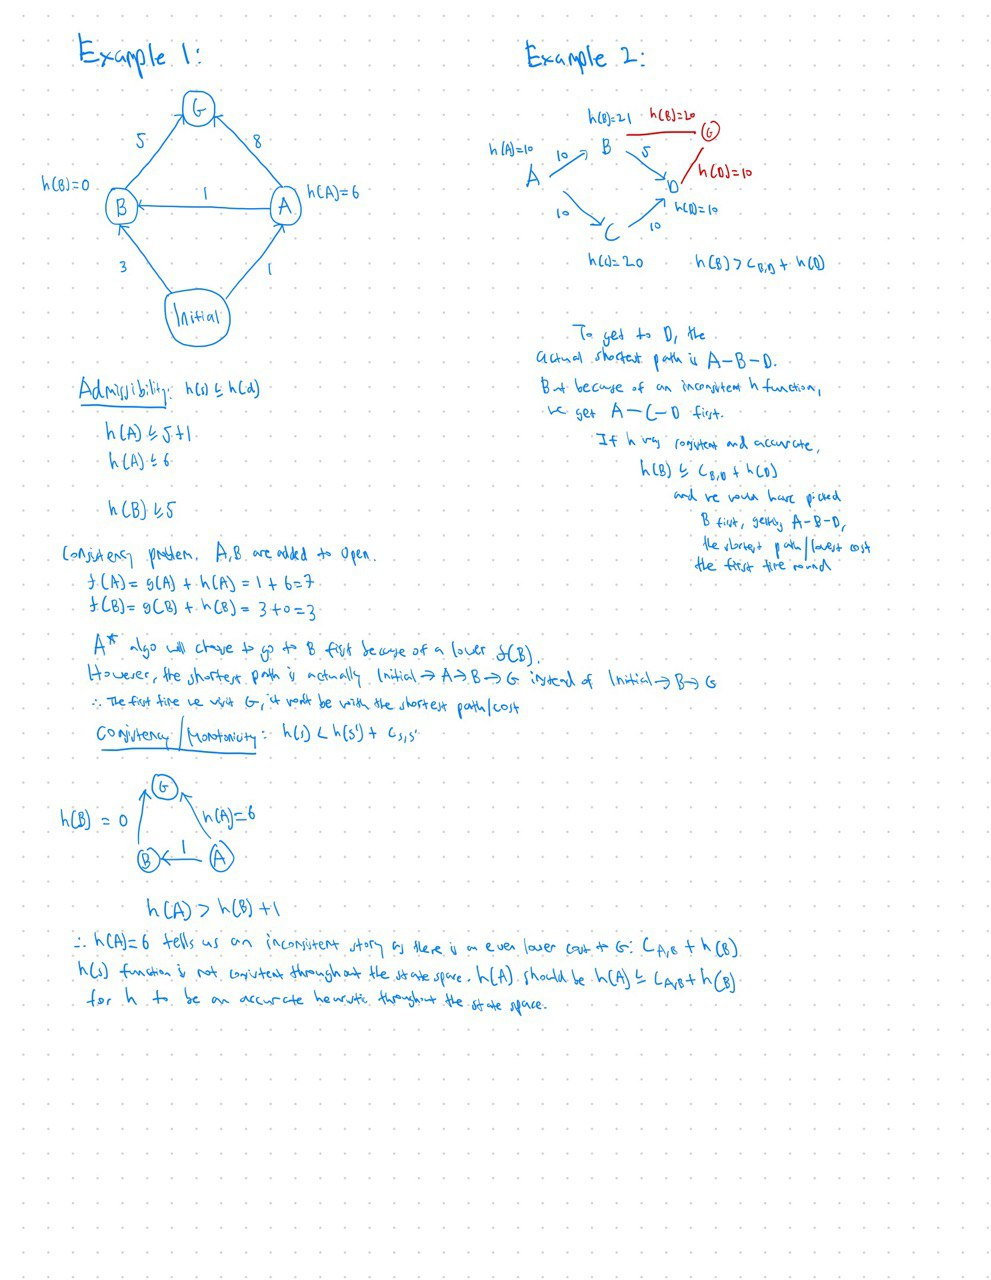

#### Admissibility Property of Heuristic Function h
If h(s) is admissible, we are guaranteed that the A* algorithm will return a least cost path eventually

### Using A star implementation from wikipedia and medium article
- https://en.wikipedia.org/wiki/A*_search_algorithm
- https://medium.com/nerd-for-tech/graph-traversal-in-python-a-algorithm-27c30d67e0d0

If the cost to s' is lower than what was previously calculated, add it to the open set again with the updated value for recalculations in the rest of the state space. This is to counter non-consistent heuristics

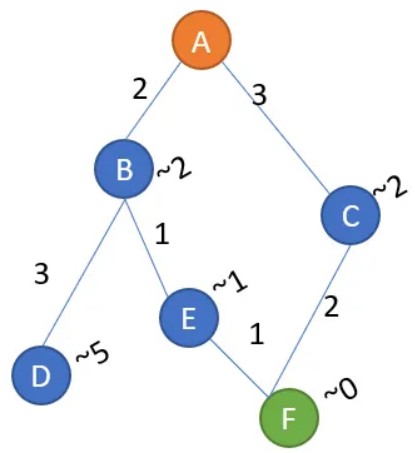

In [3]:
# Adj List
# [c_s,s' Cost to go to neighbour s' from state s, Heuristic h(s))
graph={
    'A':{'B':[2,2],'C':[3,2]},
    'B':{'D':[3,5],'E':[1,1]},
    'C':{'F':[2,0]},
    'D':{},
    'E':{'F':[1,0]},
    'F':{}
}

In [13]:
def AstarAlgorithm_wikipedia(initial_state,goal_state,graph):

    def make_path(initial_state,goal_state,parents):
        path = []
        state = goal_state
        while state!=initial_state:
            path.append(state)
            state = parents[state]
        path.append(initial_state)
        path.reverse()
        return path
        
    # Initialise the open set i.e. queue
    open = [(0,initial_state)]
    
    # Initialise the g scores and f scores of every node to infinity
    g_score = {}
    f_score = {}
    for k in graph.keys():
        g_score[k] = float('inf')
        f_score[k] = float('inf')
    # Initialise the g score and f score of the initial state to be 0
    g_score['A']=0
    f_score['A']=0
    
    # Initialise the parents
    parents = {}
    
    # While the A* algorithm is not done
    while len(open) > 0:
        node = heapq.heappop(open)
        s = node[1]
    
        # Terminating condition
        if s==goal_state:
            return make_path(initial_state,goal_state,parents)
    
        # For all s' of s (all neighbours of s)
        for sprime,sprime_info in graph[s].items():
            # Calculate the g score of s' to check if it is a lower cost than anything previously calculated. Done for optimality
            cost_s_sprime = sprime_info[0]
            h_sprime = sprime_info[1]
            temp_g_score = g_score[s] + cost_s_sprime
            # If the cost to s' is lower than what was previously calculated, add it to the open set again with the updated value for recalculations in the rest of the state space
            if temp_g_score < g_score[sprime]:
                # Update the g score of s'
                g_score[sprime] = temp_g_score
                # Update the f score of s' f(s') = g(s') + h(s')
                f_score[sprime] = g_score[sprime] + h_sprime
                # Update the parent of s'
                parents[sprime] = s
                # Add to open list for calculations in the rest of the state space
                open.append((f_score[sprime], sprime))
    
    return False


In [14]:
import heapq
AstarAlgorithm_wikipedia('A','F',graph)

['A', 'B', 'E', 'F']

### Using A star implementation from Caltech

Using A star implementation from https://robotics.caltech.edu/wiki/images/e/e0/Astar.pdf

Each node maintains a pointer to its parent so we can retrieve the best path found

Explanation from caltech (https://robotics.caltech.edu/wiki/images/e/e0/Astar.pdf):
1. A-Star has a main loop that repeatedly gets the node, call it n, with the lowest f(n) value from the OPEN list (in
other words, the node that we think is the most likely to contain the optimal solution). If n is the goal node, then
we are done, and all that’s left to do is return the solution by backtracking from 

2. Otherwise, we remove n from
the OPEN list and add it to the CLOSED list. Next, we generate all the possible successor nodes of n (the action
set U(n)). For each successor node n’, if it is already in the CLOSED list and the copy there has an equal or
lower f estimate, then we can safely discard the newly generated n’ and move on (we can do this since a copy
with a better estimate on the CLOSED list means we’ve already looked at it, and the new copy won’t do any
better). Similarly, if n’ is already in the OPEN list and the copy there has an equal or lower f estimate, we can
discard the newly generated n’ and move on (we’re going to be looking at a better version of n’ later, so no need
to keep this one a

3. If no better version of n’ exists on either the CLOSED or OPEN lists, we remove the inferior copies from the
two lists and set n as the parent of n’. We also have to calculate the cost estimates for n’ as follows: set g(n’) to
g(n) plus the cost of getting from n to n’; set h(n’) to the heuristic estimate of getting from n’ to the goal node;
and set f(n’) to g(n’) plus h(n’). Lastly, add n’ to the OPEN list and return to the beginning of the main l

```
Initialize OPEN list (to the empty list)
Initialize CLOSED list (to the empty list)
Create goal node; call it node_goal
Create start node; call it node_start
Add node_start to the OPEN 

while the OPEN list is not empty
{
 Get node n off the OPEN list with the lowest f(n)
 Add n to the CLOSED list
 IF n is the same as node_goal
we have found the solution; return Soluti

ELSE: Generate each successor node n' of n
 for each successor node n' of n
 {
 Set the parent of n' to n
 Set h(n') to be the heuristically estimate distance to node_goal
 Set g(n') to be g(n) plus the cost to get to n' from n
 Set f(n') to be g(n') plus h(n')
 if n' is on the OPEN list and the existing one is as good or better
 then discard n' and continue
 if n' is on the CLOSED list and the existing one is as good or better
 then discard n' and continue
 Remove occurrences of n' from OPEN and CLOSED
 Add n' to the OPEN list
 }
}
return failure (if we reach this point, we’ve searched all reachable nodes and still
haven’t  |  Besn’t exist)on(n)list
```oopround).

#### Cases that check in open list will occur

```
   C
  / \
A    D
  \ /
   B
```

#### Cases that check in closed list will occur

```
   C
  / \
A  | D
  \ /
   B
```

In [16]:
# Adj List
# [c_s,s' Cost to go to neighbour s' from state s, Heuristic h(s))
graph={
    'A':{'B':[2,2],'C':[3,2]},
    'B':{'D':[3,5],'E':[1,1]},
    'C':{'F':[2,0]},
    'D':{},
    'E':{'F':[1,0]},
    'F':{}
}

In [17]:
def AstarAlgorithm_caltech(initial_state,goal_state,graph):

    def make_path(initial_state,goal_state,parents):
        path = []
        state = goal_state
        while state!=initial_state:
            path.append(state)
            state = parents[state]
        path.append(initial_state)
        path.reverse()
        return path
        
    # Initialise the open set i.e. queue
    open = [(0,initial_state)]
    closed = []
    
    # Initialise the parents
    parents = {}
    
    # While the A* algorithm is not done
    while len(open) > 0:
        node = heapq.heappop(open)
        g_s = node[0]
        s = node[1]
        # Add s to closed
        closed.append((g_s,s))
    
        # Terminating condition
        if s==goal_state:
            return make_path(initial_state,goal_state,parents)
    
        # For all s' of s (all neighbours/successor states of s)
        for sprime,sprime_info in graph[s].items():
            cost_s_sprime = sprime_info[0]
            h_sprime = sprime_info[1]
            
            # Set the parent of s' to be s
            parents[sprime] = s

            # Calculate h,g,f functions
            h_sprime = h_sprime
            g_sprime = g_s + cost_s_sprime
            f_sprime = g_sprime + h_sprime

            # Check if the state is in the open list
            # if the same state in the open list has a better f estimate (basically just comparing the g cost up to it
            # because the heuristic would be the same) then there is no point in expanding this successor state
            in_open = [state for state in open if state[0]==sprime]
            if len(in_open)>0:
                if in_open[0][1] < f_sprime:
                    continue

            # Check if the state is in the closed list after checking if it is in the open list
            # if the same state in the list has a better f estimate (basically just comparing the g cost up to it
            # because the heuristic would be the same) then there is no point in expanding this successor state
            in_closed = [state for state in closed if state[0]==sprime]
            if len(in_closed)>0:
                if in_closed[0][1] < f_sprime:
                    continue

            # Remove occurences of s' from open and closed
            open = [state for state in open if state[0]!=sprime]
            closed = [state for state in closed if state[0]!=sprime]

            open.append((f_sprime,sprime))
    
    return False

In [18]:
import heapq
AstarAlgorithm('A','F',graph)

['A', 'B', 'E', 'F']

### Question: Are the above implementations wrong if we stop searching after finding the goal state? What if the heuristic is inconsistent?

The algorithms above do account for non-consistent heuristic before reaching the goal state, where if we find a g cost to s' that is lower than what was previously calculated, we add it to the open set again with the updated value for recalculations in the rest of the state space. However, the algorithms do not account for a non-consistent heuristic after reaching the goal state where there could still be lower cost paths to the goal state as a result of a non-consistent heuristic

#### Cases that check in open list will occur before reaching goal state

```
   C
  / \
A    D
  \ /
   B
```

#### Cases that check in closed list will occur before reaching goal state

```
   C
  / \
A  | D
  \ /
   B
```

#### Why the algorithm cannot stop after reaching the goal state

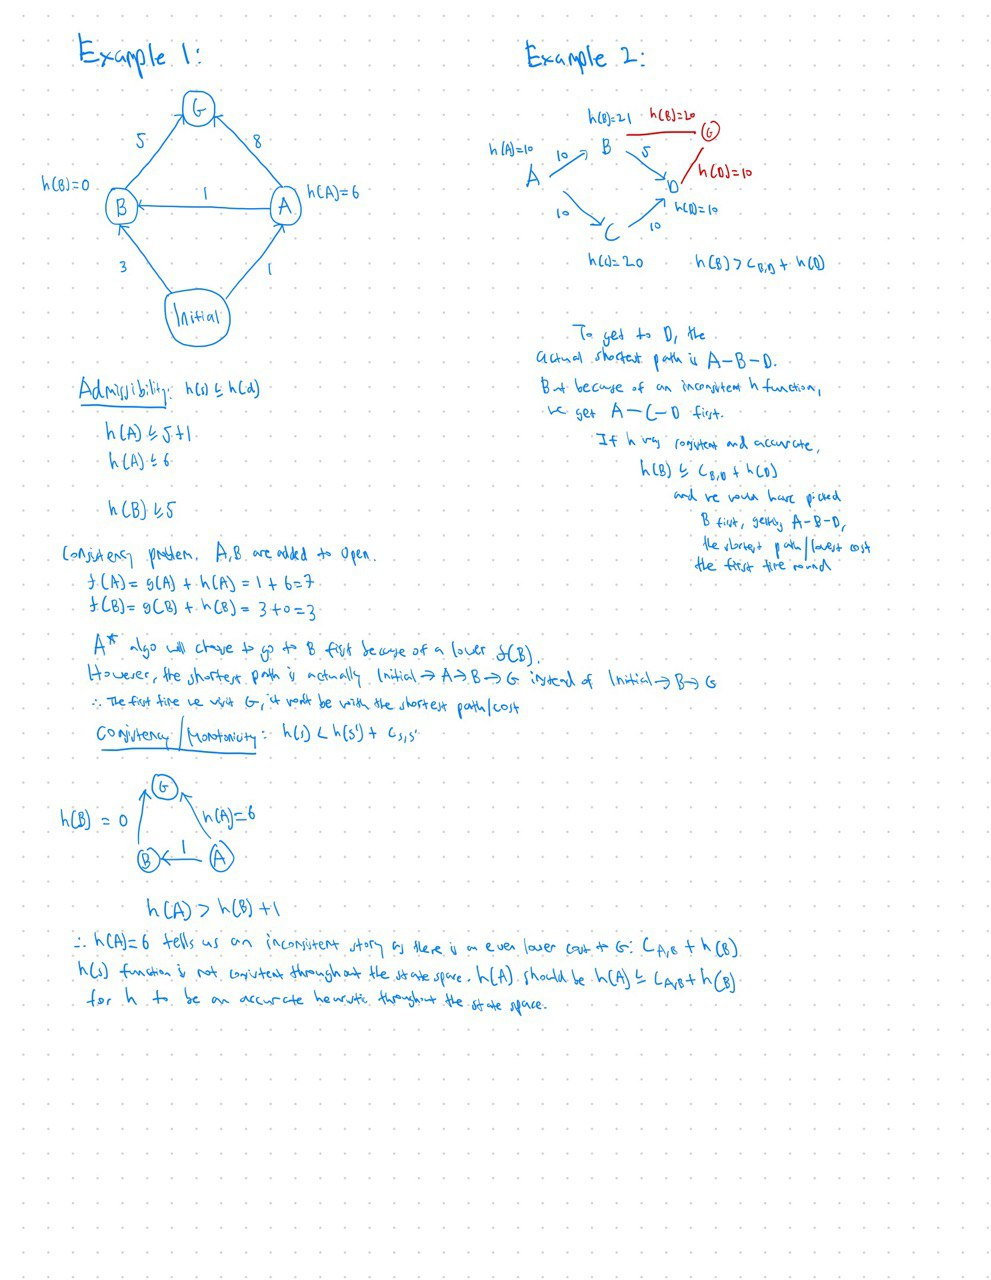

### Using A star implementation from Aalto

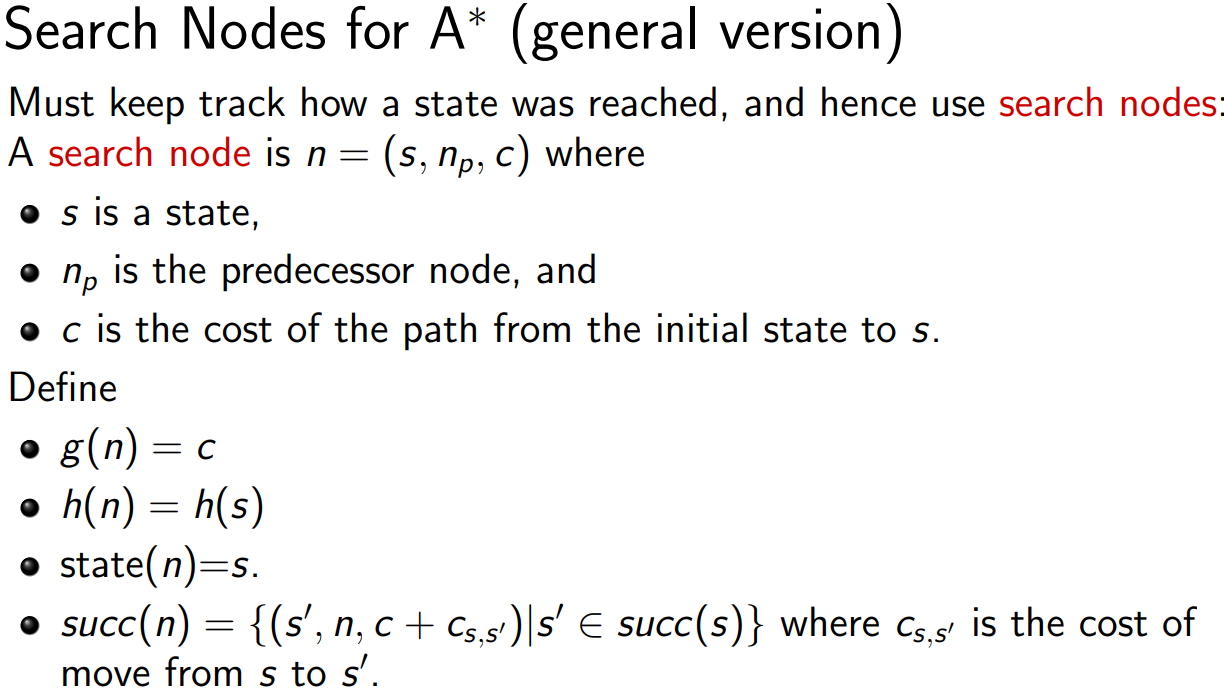

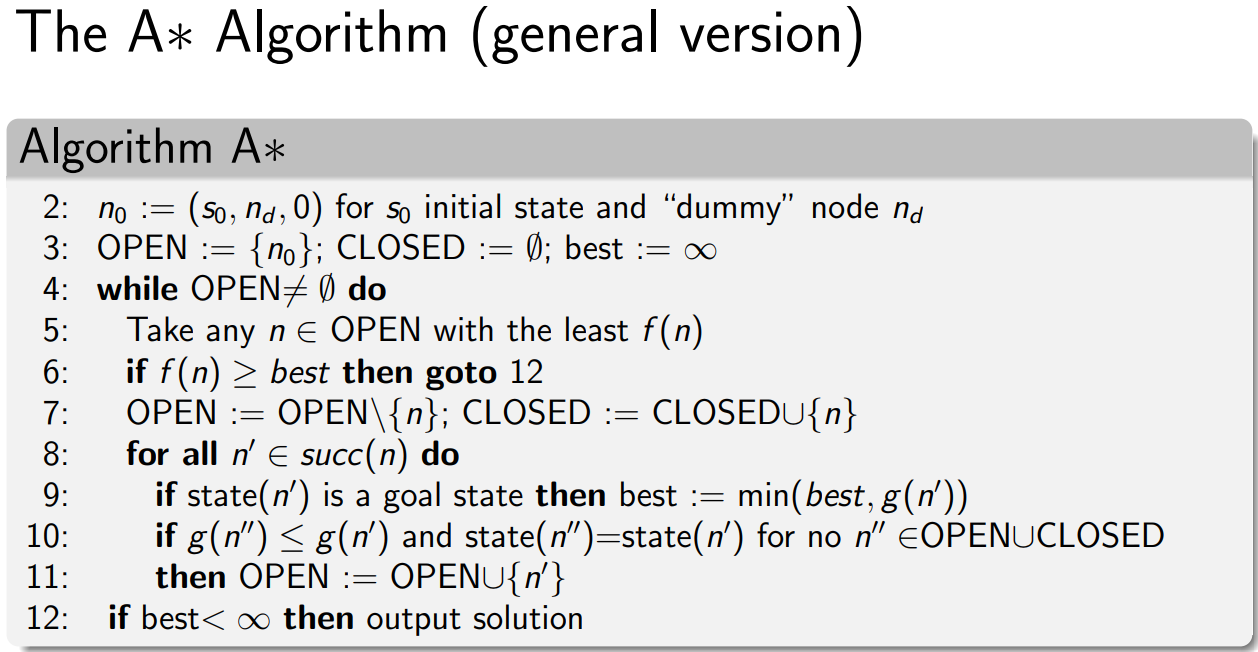

Pseudocode

```
1. Initialise search node (state, parent, cost from initial state to current state) for initial state
2. Initialise open and closed set. Set best to infinity: Keeps track of best cost from initial state to goal state
3. While there are still nodes to be searched
4. Pop state from open queue that has the lowest f(s)=g(s)+h(s)
5. If f(s) >= best go to line 11
6. Remove state from open set, add state to closed set
7. For all successor states
8. If the successor state is a goal state, compute best=min(best,g(successor state))
9. If the successor state exists in the open or closed set with a <=g(s'), do nothing
10. Else, add the successor state to the open set
11. If best is less than infinity, return the solution
```

Extra hints:

1. Choose the next state to be expanded from the open set based on lowest f-value
```
f-value = g-value (weight/cost of path from initial state to current state) + h-value (heuristic lower-bound estimate of remaining cost to goal state)
```

2. After expanding a state (determining its successors), calculate the f-values for each of the sucessors.


3. The algorithm does not terminate when first encountering a goal state, but only when there are no states in OPEN with an f-value lower than the cost of the best solution path found so far

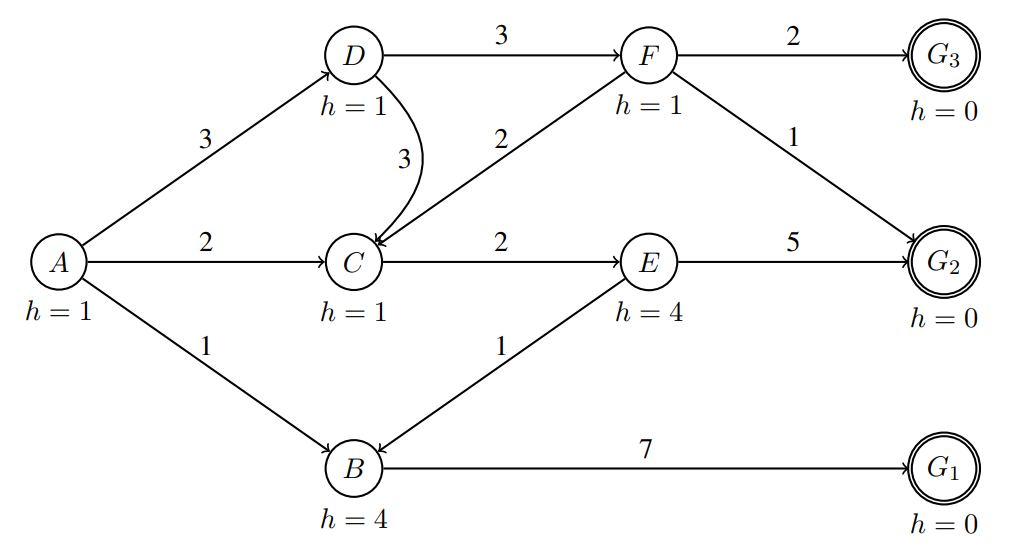

In [30]:
# Adj Lists
arcs = {
    'A':{ 'D':3, 'C':2, 'B':1 },
    'D':{ 'C':3, 'F':3 },
    'C':{ 'E':2 },
    'B':{ 'G1':7 },
    'F':{ 'C':2, 'G2':1, 'G3':2 },
    'E':{ 'B':1, 'G2':5},
    'G1': {},
    'G2': {},
    'G3': {}
}

h = {
    'A':1,
    'D':1,
    'C':1,
    'B':4,
    'F':1,
    'E':4,
    'G3':0,
    'G2':0,
    'G1':0
}

In [31]:
class State:
    def __init__(self, state, parent, g_val, heuristic):
        self.state = state
        self.parent = parent
        self.g_val = g_val
        self.f_val = g_val + heuristic 

In [32]:
def AstarAlgorithm_aalto(initial_state_name,goal_state_name,arcs,heuristic):

    # Initialise the initial state
    initial_state = State(initial_state_name,None,0,heuristic[initial_state_name])
    # Initialise the open set and closed set i.e. queue
    open = [initial_state]
    closed = []
    # Initialise best
    best = float('inf')

    # Initialise goal state
    goal_state = None
    
    def make_path(initial_state_name,goal_state):
        path = []
        state = goal_state
        while state.state!=initial_state_name:
            path.append(state.state)
            state = state.parent
        path.append(initial_state_name)
        path.reverse()
        return path
    
    # While the A* algorithm is not done
    while len(open) > 0:
        # Select the state with the lowest f-val for expansion
        s = min(open, key=lambda state: state.f_val)

        # If the f-val of the state is more than best, the solution has been found previously
        # If the f-val of the state is more than best, it means that
        # all the remaining states in the open set have a greater f-val,
        # indicating that the best solution has been discovered and further expansion
        # will not yield a better solution
        # This saves resources and makes the algorithm more efficient
        if s.f_val >= best and best < float('inf'):
            return make_path(initial_state_name,goal_state)

        # Remove the state from the open set and add it to the closed set
        open.remove(s)
        closed.append(s)

        # For all successor states s' of state s
        for sprime_name,cost_s_sprime in arcs[s.state].items():
            sprime = State(sprime_name,s,s.g_val+cost_s_sprime,heuristic[sprime_name])

            # If the successor state is a goal state, compute best=min(best,g(successor state))
            if sprime_name==goal_state_name:
                goal_state = sprime
                best = min(best,sprime.g_val)

            # If the successor state exists in the open or closed set with a <=g(s'), do nothing
            # Check if the state is in the open list
            # if the same state in the open list has a better f estimate (basically just comparing the g cost up to it
            # because the heuristic would be the same) then there is no point in expanding this successor state
            in_open = [state for state in open if state.state==sprime_name]
            if len(in_open)>0:
                if in_open[0].f_val <= sprime.f_val:
                    continue
            # Check if the state is in the closed list after checking if it is in the open list
            # if the same state in the list has a better f estimate (basically just comparing the g cost up to it
            # because the heuristic would be the same) then there is no point in expanding this successor state
            in_closed = [state for state in closed if state.state==sprime_name]
            if len(in_closed)>0:
                if in_closed[0].f_val <= sprime.f_val:
                    continue

            # Add the successor state s' to the open set
            open.append(sprime)
    
    return False

In [34]:
AstarAlgorithm_aalto('A','G2',arcs,h)

['A', 'D', 'F', 'G2']